In [1]:
import sys  
sys.path.insert(1, "..")
from hfsp_scripts import hfsp_functions as hfsp
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import networkx as nx
import pandas as pd
import seaborn as sns

In [22]:
T_3d = hfsp.create_tissue("../inputs/3d_sam.csv", True)
g = T_3d

temp_sch_4wC = np.array([672])
temp_sch_4wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,12])
temp_sch = np.array([20])

p_decay = 0.00004
p_cold = 0.0004
p_warm = 0.015
p_edge = 0.01

In [23]:
%%time

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR2_30_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [3,1], rule_code_edge = 0, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))


hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR2_40_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [3,2], rule_code_edge = 0, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))


hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR2_45_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [3,3], rule_code_edge = 0, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR2_50_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [3,4], rule_code_edge = 0, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR2_55_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [3,5], rule_code_edge = 0, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR2_60_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [3,6], rule_code_edge = 0, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))

hfsp.update_spontaneous(g, jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int)))) # setting the network state to default.
df_MR2_70_4wC = hfsp.ensemble(g, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [3,7], rule_code_edge = 0, ensemble_size = 5 , jump_state = np.concatenate((np.zeros(len(g.nodes()), dtype = int) , np.ones(len(g.edges()), dtype = int))))


Wall time: 31min 18s


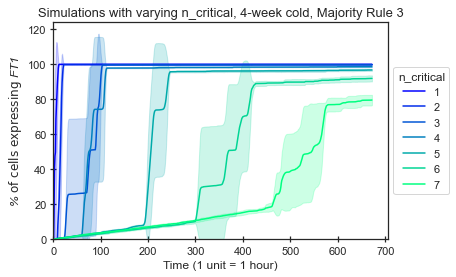

In [24]:
cmap = plt.get_cmap('winter')
colors = cmap(np.linspace(0,1,7)) #get 10 colors along the full range of hsv colormap

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulations with varying n_critical, 4-week cold, Majority Rule 3", font = "Arial", fontsize = 13)


ax.plot(df_MR2_30_4wC['time'], df_MR2_30_4wC['mean'], color = colors[0], label= '1')
ax.fill_between(df_MR2_30_4wC['time'], df_MR2_30_4wC['lower'], df_MR2_30_4wC['upper'], color = colors[0], alpha=0.2)

ax.plot(df_MR2_40_4wC['time'], df_MR2_40_4wC['mean'], color = colors[1], label='2')
ax.fill_between(df_MR2_40_4wC['time'], df_MR2_40_4wC['lower'], df_MR2_40_4wC['upper'], color= colors[1], alpha=0.2)

ax.plot(df_MR2_45_4wC['time'], df_MR2_45_4wC['mean'], color = colors[2], label='3')
ax.fill_between(df_MR2_45_4wC['time'], df_MR2_45_4wC['lower'], df_MR2_45_4wC['upper'], color= colors[2], alpha=0.2)

ax.plot(df_MR2_50_4wC['time'], df_MR2_50_4wC['mean'], color = colors[3], label='4')
ax.fill_between(df_MR2_50_4wC['time'], df_MR2_50_4wC['lower'], df_MR2_50_4wC['upper'], color= colors[3], alpha=0.2)

ax.plot(df_MR2_55_4wC['time'], df_MR2_55_4wC['mean'], color = colors[4], label='5')
ax.fill_between(df_MR2_55_4wC['time'], df_MR2_55_4wC['lower'], df_MR2_55_4wC['upper'], color= colors[4], alpha=0.2)

ax.plot(df_MR2_60_4wC['time'], df_MR2_60_4wC['mean'], color = colors[5], label='6')
ax.fill_between(df_MR2_60_4wC['time'], df_MR2_60_4wC['lower'], df_MR2_60_4wC['upper'], color=colors[5], alpha=0.2)

ax.plot(df_MR2_70_4wC['time'], df_MR2_70_4wC['mean'], color = colors[6], label='7')
ax.fill_between(df_MR2_70_4wC['time'], df_MR2_70_4wC['lower'], df_MR2_70_4wC['upper'], color = colors[6], alpha=0.2)


ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(title = "n_critical", loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig("hfsp_varying_n_critical_MR3_3D_4wC.png", dpi = 600, bbox_inches='tight')